# Introduction to Matplotlib

Get straight into plotting data, that's what we're focused on.

Video 0 will be concepts and contain details like anatomy of a figure. The rest of the videos will be pure code based.

0. Concepts in Matplotlib
1. 2 ways of creating plots (pyplot & OO) - use the OO method
2. Plotting data (NumPy arrays), line, scatter, bar, hist, subplots
3. Plotting data directly with Pandas (using the pandas matplotlib wrapper) 
4. Plotting data (pandas DataFrames) with the OO method, line, scatter, bar, hist, subplots
5. Cutomizing your plots, `limits`, `colors`, `styles`, `legends`
6. Saving plots

## 0. Concepts in Matplotlib
* What is Matplotlib?
* Why Matplotlib?
* Anatomy of a figure
* Where does Matplotlib fit into the ecosystem?
    * A Matplotlib workflow

## 1. 2 ways of creating plots
- `pyplot()`
- `OO` - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html
- Matplotlib recommends the OO API
    * https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py
    * https://matplotlib.org/3.1.1/tutorials/introductory/lifecycle.html
    
Start by importing `Matplotlib` and setting up the `%matplotlib inline` magic command.

In [33]:
# Import matplotlib and setup the figures to display within the notebook
%matplotlib inline
import matplotlib.pyplot as plt

[]

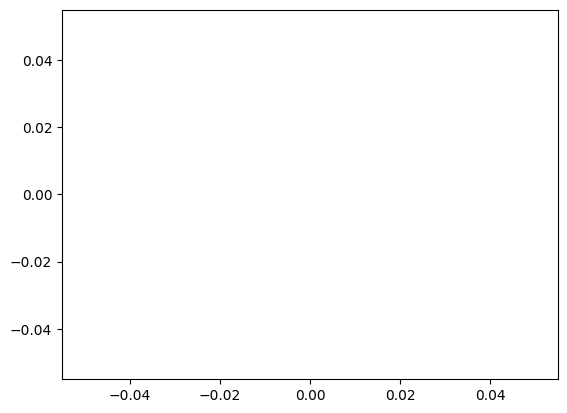

In [34]:
# Create a simple plot, without the semi-colon
plt.plot()

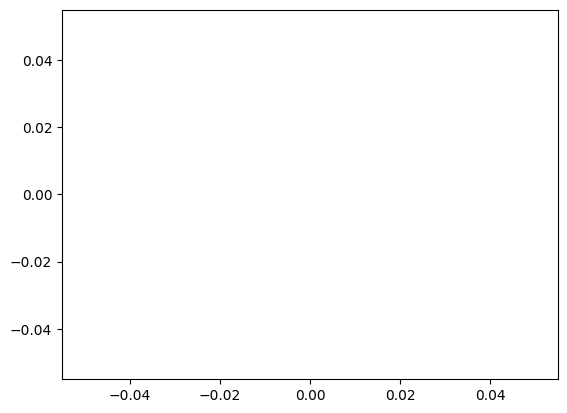

In [35]:
# With the semi-colon
plt.plot();

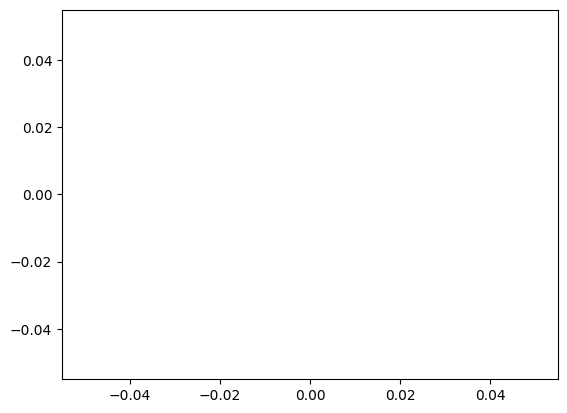

In [36]:
# You could use plt.show() if you want
plt.plot()
plt.show()

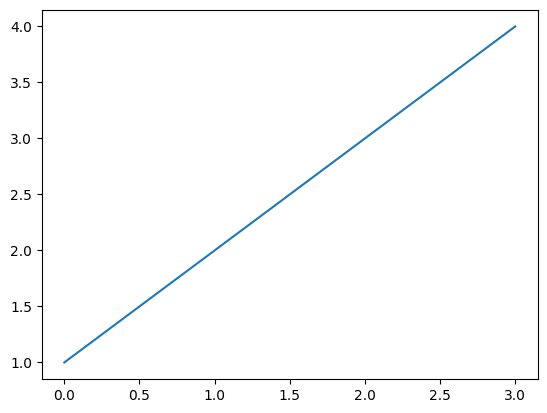

In [37]:
# Let's add some data
plt.plot([1, 2, 3, 4])

In [38]:
# Create some data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

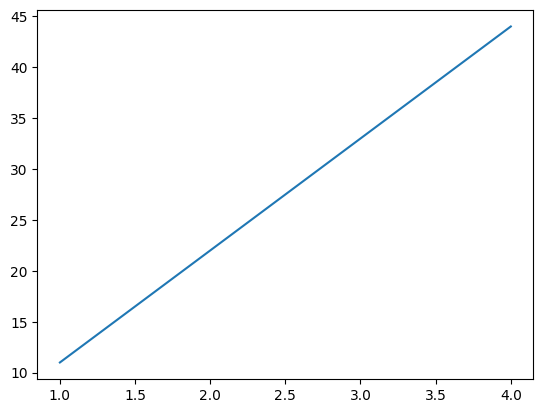

In [39]:
# With a semi-colon and now a y value
plt.plot(x, y);

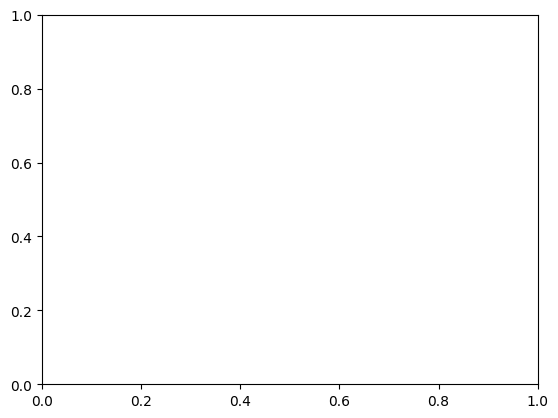

In [40]:
# Creating a plot with the OO verison, confusing way first
fig = plt.figure()
ax = fig.add_subplot()
plt.show()

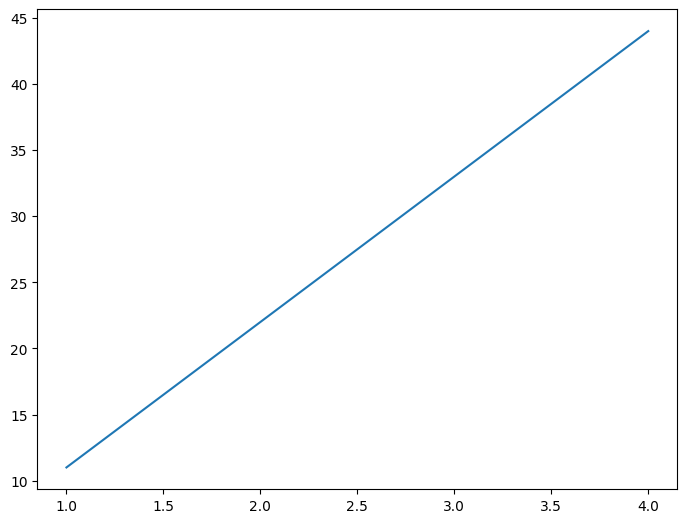

In [41]:
# Confusing #2
fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y)
plt.show()

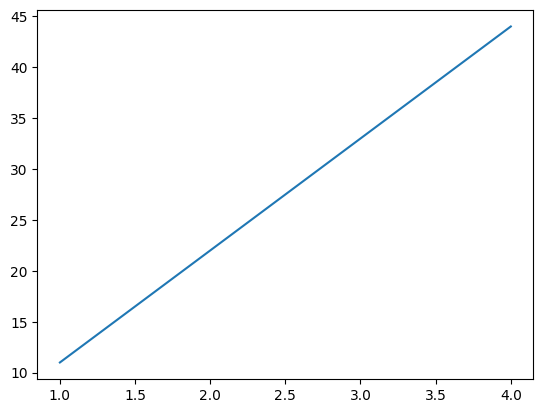

In [42]:
# Easier and more robust going forward (what we're going to use)
fig, ax = plt.subplots()
ax.plot(x, y);

### -> Show figure/plot anatomy here <-

In [43]:
# This is where the object orientated name comes from 
type(fig), type(ax)

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

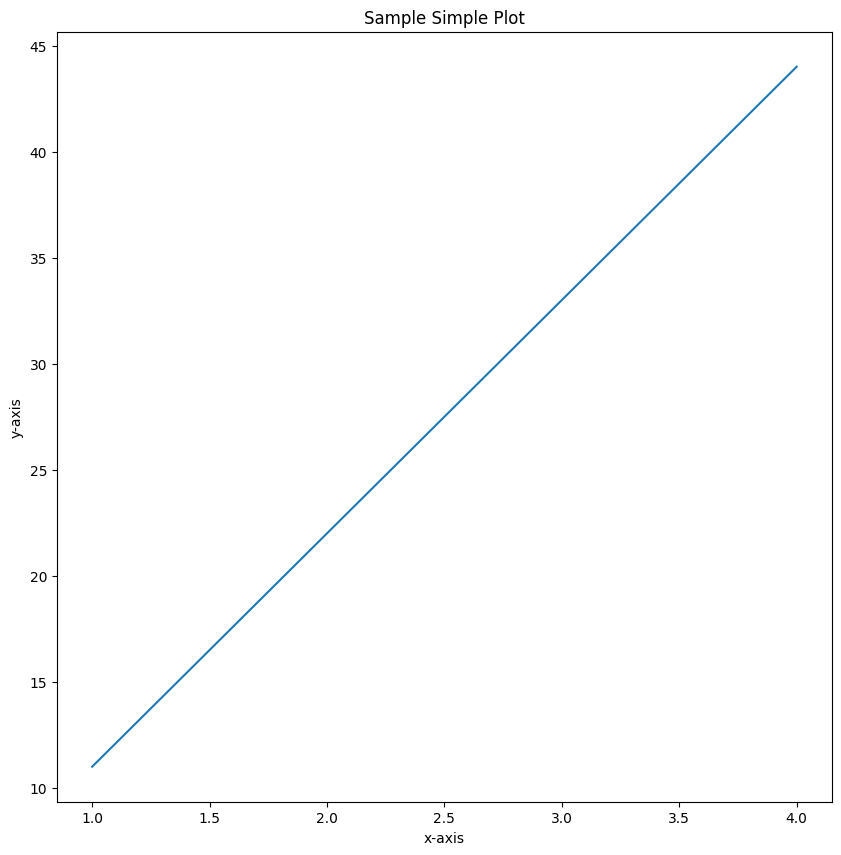

In [44]:
# A matplotlib workflow

# 0. Import and get matplotlib ready
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10,10))

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Sample Simple Plot", xlabel="x-axis", ylabel="y-axis")

# 5. Save & show
fig.savefig("../images/simple-plot.png")

## 2. Making the most common type of plots using NumPy arrays
Most of figuring out what kind of plot to use is getting a feel for the data, then see what suits it best.

Matplotlib visualizations are built off NumPy arrays. So in this section we'll build some of the most common types of plots using NumPy arrays.

- `line`
- `scatter`
- `bar`
- `hist`
- `subplots()`

To make sure we have access to NumPy, we'll import it as `np`.

In [45]:
import numpy as np

### Line

Line is the default type of visualization in Matplotlib. Usually, unless specified otherwise, your plots will start out as lines.

In [46]:
# Create an array
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

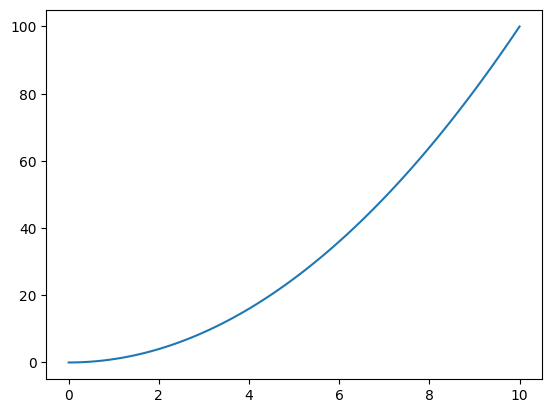

In [47]:
# The default plot is line
fig, ax = plt.subplots()
ax.plot(x, x**2);

### Scatter

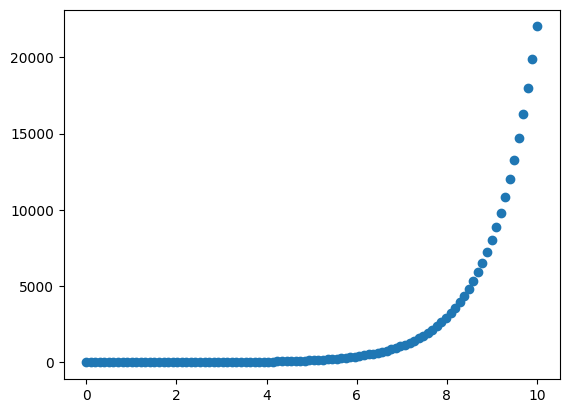

In [48]:
# Need to recreate our figure and axis instances when we want a new figure
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

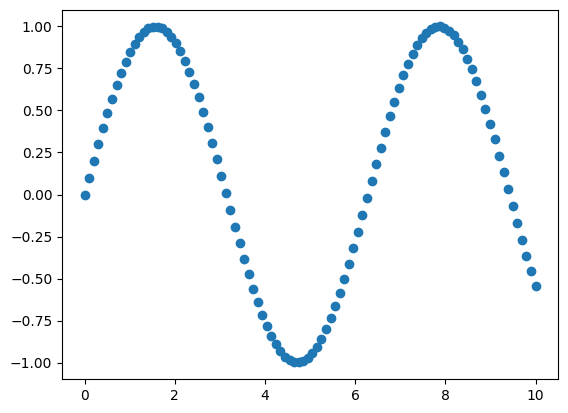

In [49]:
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

### Bar
* Vertical
* Horizontal

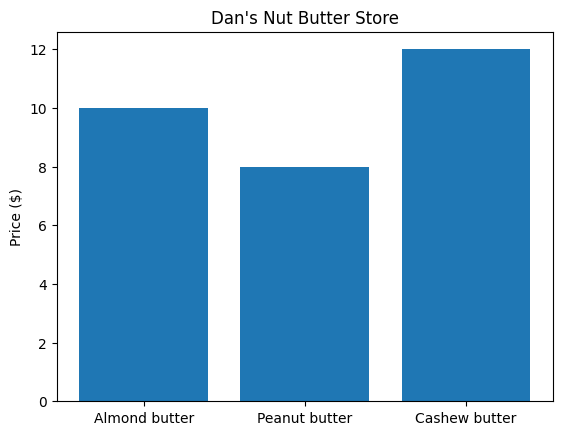

In [50]:
# You can make plots from a dictionary
nut_butter_prices = {"Almond butter": 10,
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Dan's Nut Butter Store", ylabel="Price ($)");

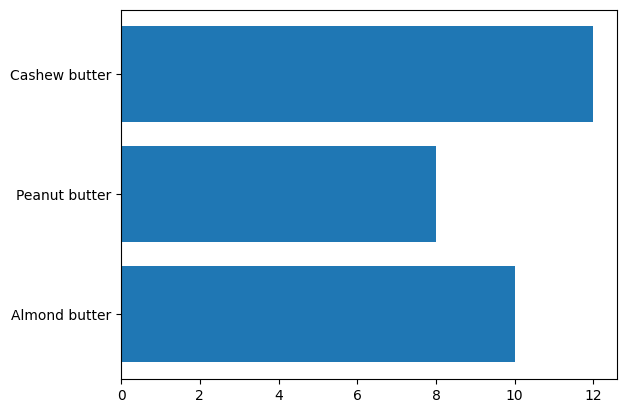

In [51]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

### Histogram (hist)

* Could show image of normal distribution here

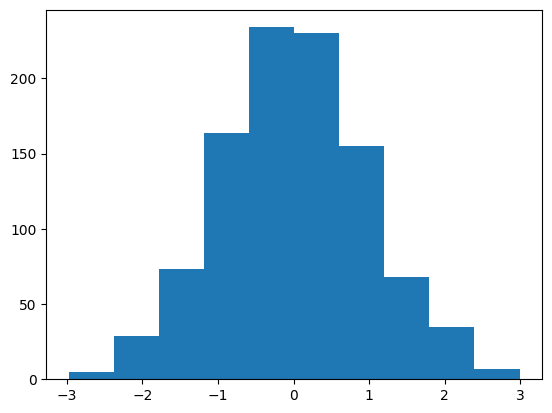

In [52]:
# Make some data from a normal distribution
x = np.random.randn(1000) # pulls data from a normal distribution

fig, ax = plt.subplots()
ax.hist(x);

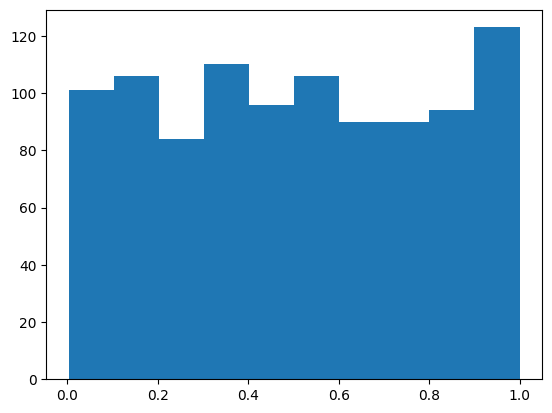

In [53]:
x = np.random.random(1000) # random data from random distribution

fig, ax = plt.subplots()
ax.hist(x);

### Subplots
* Multiple plots on one figure
https://matplotlib.org/3.1.1/gallery/recipes/create_subplots.html

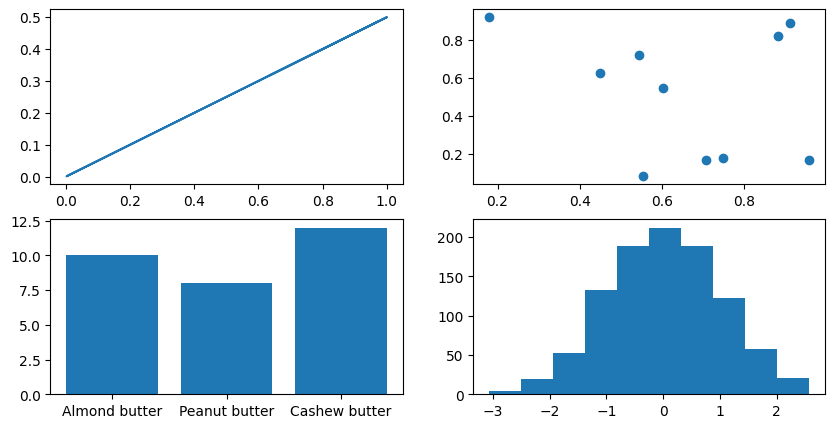

In [54]:
# Option 1: Create multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, 
                                             ncols=2, 
                                             figsize=(10, 5))

# Plot data to each axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

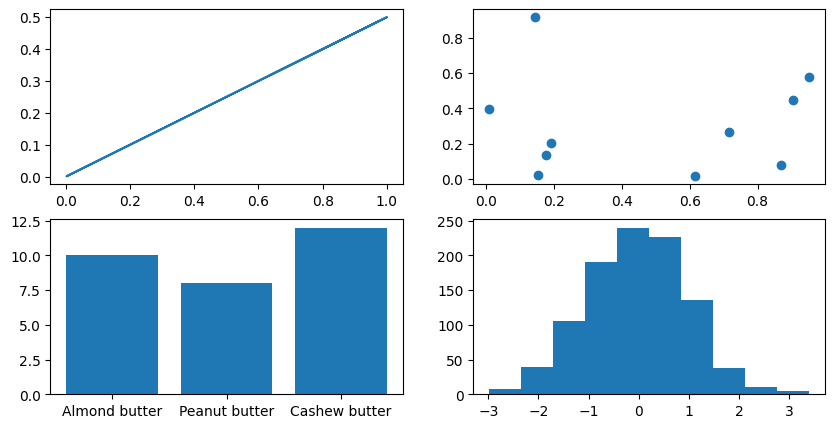

In [55]:
# Option 2: Create multiple subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Index to plot data
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));

## 3. Plotting data directly with pandas
This section uses the pandas `pd.plot()` method on a DataFrame to plot columns directly.

* https://datatofish.com/plot-dataframe-pandas/
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

* `line`
* `scatter`
* `bar`
* `hist`
* `df.plot(subplots=True, figsize=(6, 6))`

To plot data with pandas, we first have to import it as `pd`.

In [56]:
import pandas as pd

Now we need some data to check out.

In [57]:
# Let's import the car_sales dataset
car_sales = pd.read_csv("../data/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


### Line
* Concept
* DataFrame

Often, reading things won't make sense. Practice writing code for yourself, get it out of the docs and into your workspace. See what happens when you run it.

Let's start with trying to replicate the pandas visualization documents.

In [58]:
# Start with some dummy data
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2020', periods=1000))
ts

2020-01-01   -0.481638
2020-01-02    2.563416
2020-01-03   -0.486702
2020-01-04   -0.835401
2020-01-05   -0.464501
                ...   
2022-09-22    0.194274
2022-09-23    0.080196
2022-09-24    0.267299
2022-09-25    1.563830
2022-09-26   -2.164926
Freq: D, Length: 1000, dtype: float64

In [59]:
# What does cumsum() do?
ts.cumsum()

2020-01-01    -0.481638
2020-01-02     2.081778
2020-01-03     1.595075
2020-01-04     0.759674
2020-01-05     0.295173
                ...    
2022-09-22   -26.791088
2022-09-23   -26.710892
2022-09-24   -26.443593
2022-09-25   -24.879763
2022-09-26   -27.044689
Freq: D, Length: 1000, dtype: float64

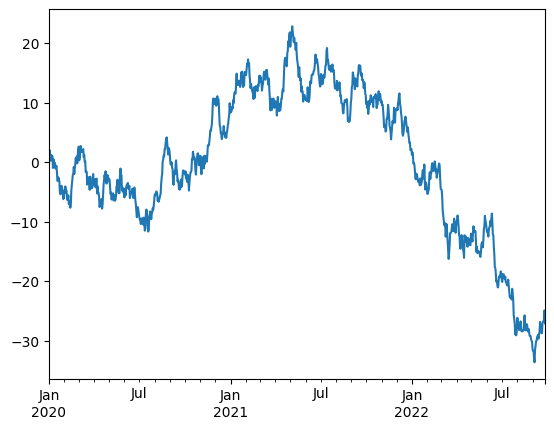

In [60]:
ts.cumsum().plot();

### Working with actual data

Let's do a little data manipulation on our `car_sales` DataFrame.

In [61]:
# Remove price column symbols
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [62]:
# Remove last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000."
1,Honda,Red,87899,4,"$5,000."
2,Toyota,Blue,32549,3,"$7,000."
3,BMW,Black,11179,5,"$22,000."
4,Nissan,White,213095,4,"$3,500."
5,Toyota,Green,99213,4,"$4,500."
6,Honda,Blue,45698,4,"$7,500."
7,Honda,Blue,54738,4,"$7,000."
8,Toyota,White,60000,4,"$6,250."
9,Nissan,White,31600,4,"$9,700."


In [63]:
# Add a date column
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,"$4,000.",2020-01-01
1,Honda,Red,87899,4,"$5,000.",2020-01-02
2,Toyota,Blue,32549,3,"$7,000.",2020-01-03
3,BMW,Black,11179,5,"$22,000.",2020-01-04
4,Nissan,White,213095,4,"$3,500.",2020-01-05
5,Toyota,Green,99213,4,"$4,500.",2020-01-06
6,Honda,Blue,45698,4,"$7,500.",2020-01-07
7,Honda,Blue,54738,4,"$7,000.",2020-01-08
8,Toyota,White,60000,4,"$6,250.",2020-01-09
9,Nissan,White,31600,4,"$9,700.",2020-01-10


In [64]:
# Make total sales column (doesn't work, adds as string)
#car_sales["Total Sales"] = car_sales["Price"].cumsum()

# Oops... want them as int's not string
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

ValueError: invalid literal for int() with base 10: '$4,000.'

In [65]:
car_sales.plot(x='Sale Date', y='Total Sales');

KeyError: 'Total Sales'

### Scatter
* Concept
* DataFrame

<Axes: xlabel='Odometer (KM)', ylabel='Price'>

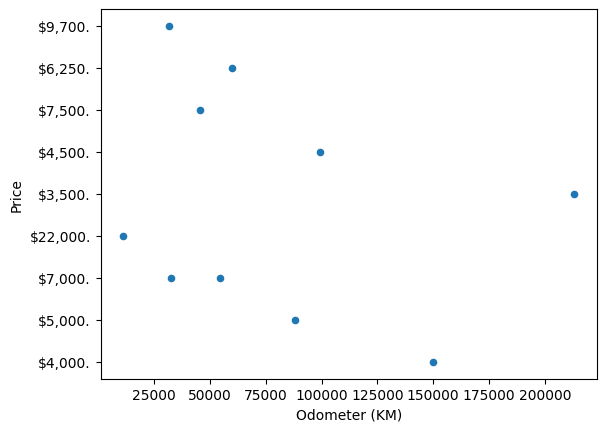

In [66]:
# Doesn't work
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter")

In [67]:
# Convert Price to int
car_sales["Price"] = car_sales["Price"].astype(int)
car_sales.plot(x="Odometer (KM)", y="Price", kind='scatter');

ValueError: invalid literal for int() with base 10: '$4,000.'

### Bar
* Concept
* DataFrame

In [68]:
x = np.random.rand(10, 4)
x

array([[0.12808394, 0.03399746, 0.94430981, 0.93306077],
       [0.43381228, 0.82318209, 0.55699762, 0.98212504],
       [0.77318023, 0.84937125, 0.8290533 , 0.04281306],
       [0.69925586, 0.8507303 , 0.94770767, 0.12218682],
       [0.37756378, 0.52585218, 0.90787563, 0.1442697 ],
       [0.38806928, 0.1415957 , 0.84407351, 0.09360699],
       [0.79026446, 0.6304597 , 0.6477479 , 0.28098637],
       [0.92700024, 0.21779529, 0.01649796, 0.39699846],
       [0.77934698, 0.6743532 , 0.43540635, 0.40244307],
       [0.04852543, 0.21385789, 0.29140449, 0.11352384]])

In [69]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.128084,0.033997,0.944310,0.933061
1,0.433812,0.823182,0.556998,0.982125
2,0.773180,0.849371,0.829053,0.042813
3,0.699256,0.850730,0.947708,0.122187
4,0.377564,0.525852,0.907876,0.144270
5,0.388069,0.141596,0.844074,0.093607
6,0.790264,0.630460,0.647748,0.280986
7,0.927000,0.217795,0.016498,0.396998
8,0.779347,0.674353,0.435406,0.402443
9,0.048525,0.213858,0.291404,0.113524


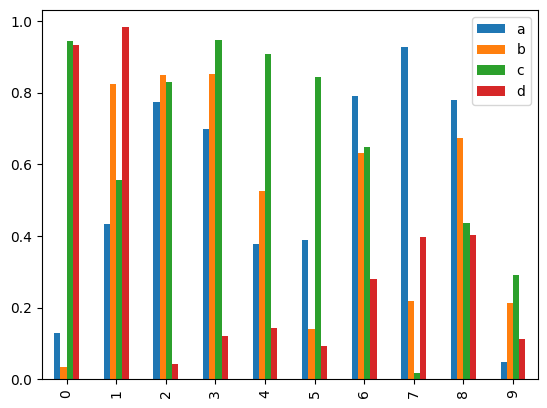

In [70]:
df.plot.bar();

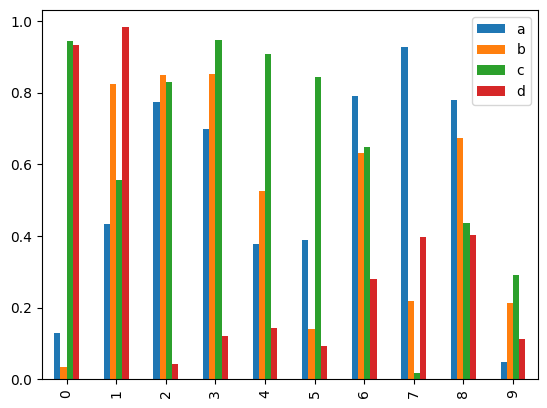

In [71]:
# Can do the same thing with 'kind' keyword
df.plot(kind='bar');

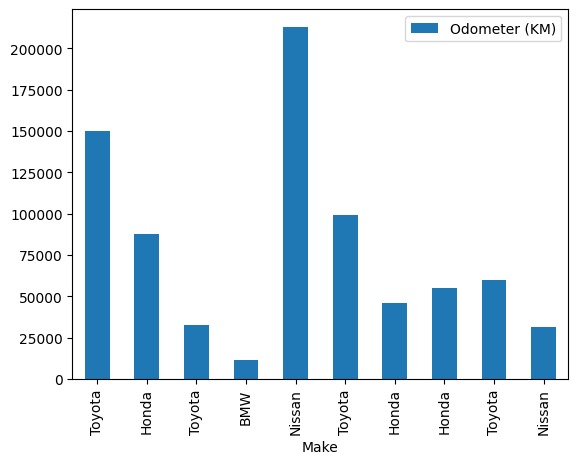

In [72]:
car_sales.plot(x='Make', y='Odometer (KM)', kind='bar');

### Histograms


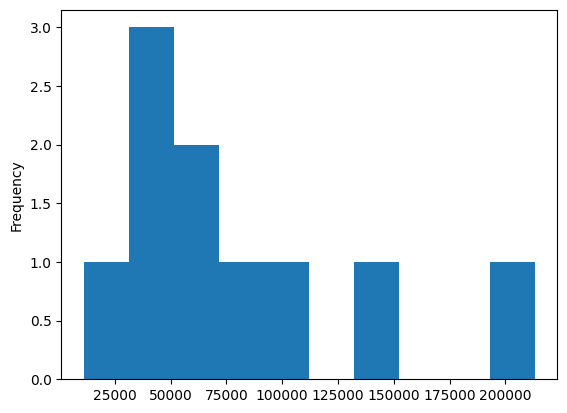

In [73]:
car_sales["Odometer (KM)"].plot.hist();

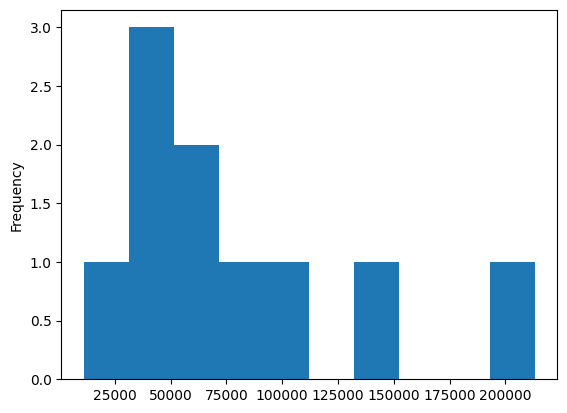

In [74]:
car_sales["Odometer (KM)"].plot(kind="hist");

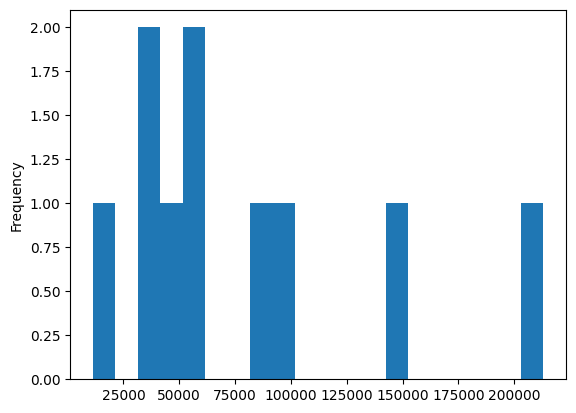

In [75]:
# Default number of bins is 10 
car_sales["Odometer (KM)"].plot.hist(bins=20);

In [76]:
car_sales["Price"].plot.hist(bins=10);

TypeError: no numeric data to plot

In [77]:
# Let's try with another dataset
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


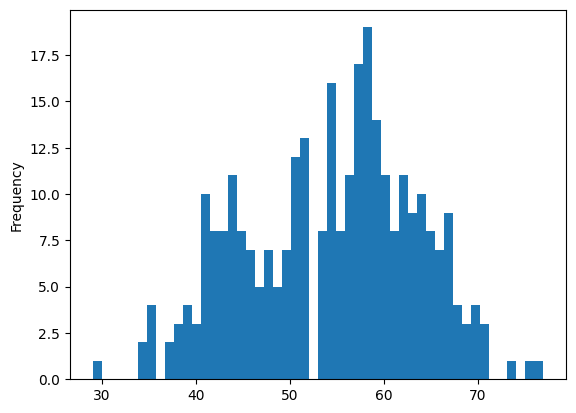

In [78]:
heart_disease["age"].plot.hist(bins=50);

### Subplots
* Concept
* DataFrame

In [79]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


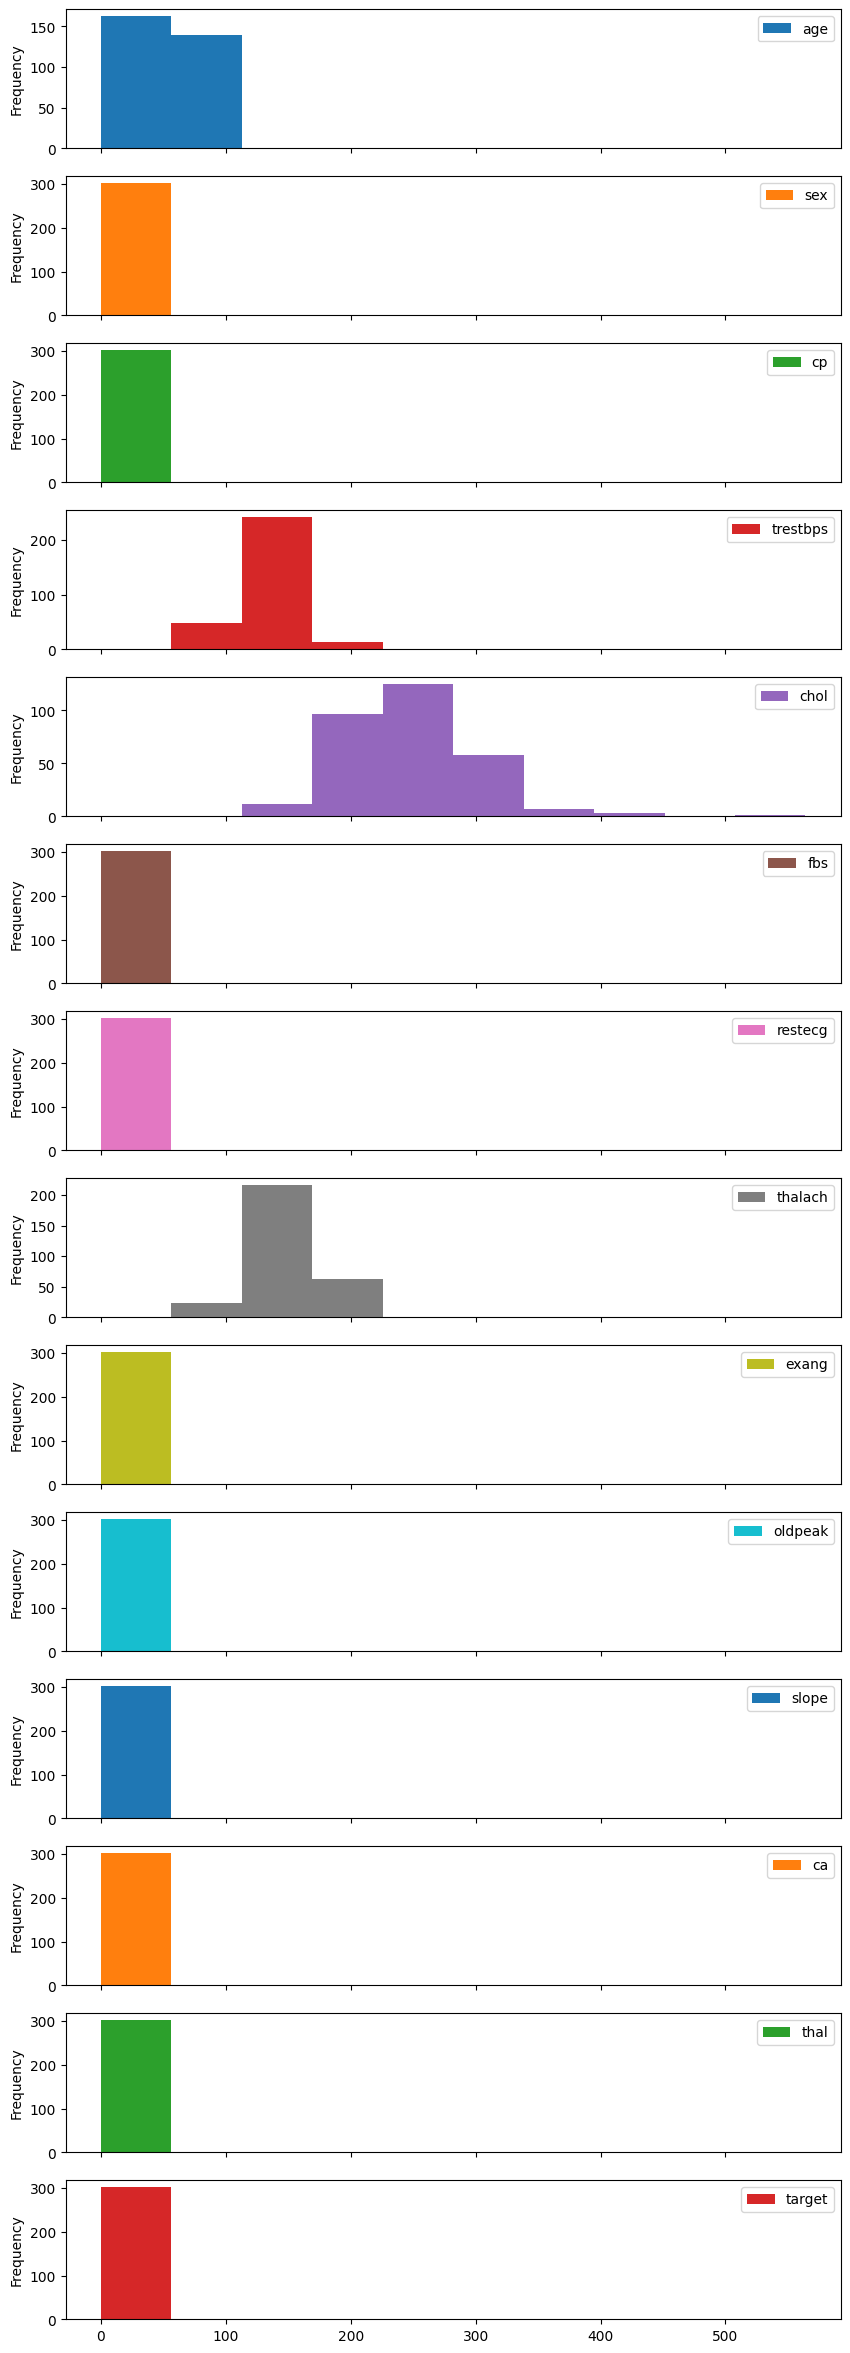

In [80]:
heart_disease.plot.hist(figsize=(10, 30), subplots=True);

## 4. Plotting with pandas using the OO method 

For more complicated plots, you'll want to use the OO method.

In [81]:
# Perform data analysis on patients over 50
over_50 = heart_disease[heart_disease["age"] > 50]
over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


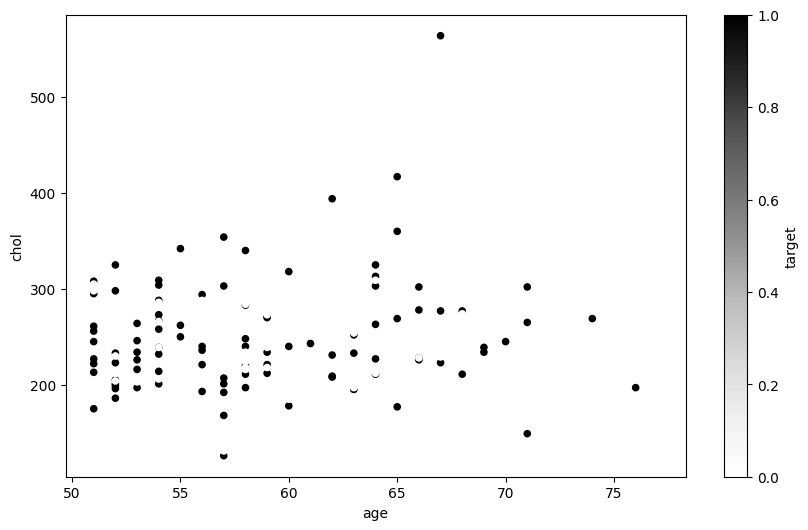

In [82]:
over_50.plot(kind='scatter', 
             x='age', 
             y='chol', 
             c='target', 
             figsize=(10, 6));

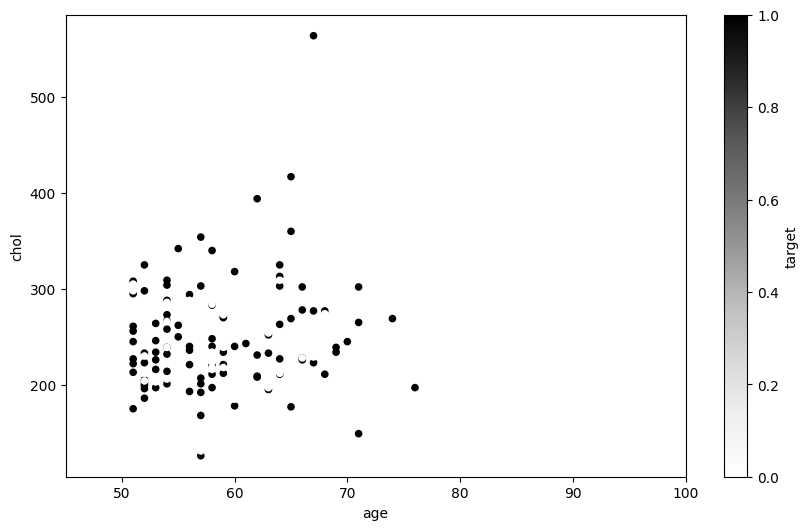

In [83]:
fig, ax = plt.subplots(figsize=(10, 6))
over_50.plot(kind='scatter', 
             x="age", 
             y="chol", 
             c='target', 
             ax=ax);
ax.set_xlim([45, 100]);

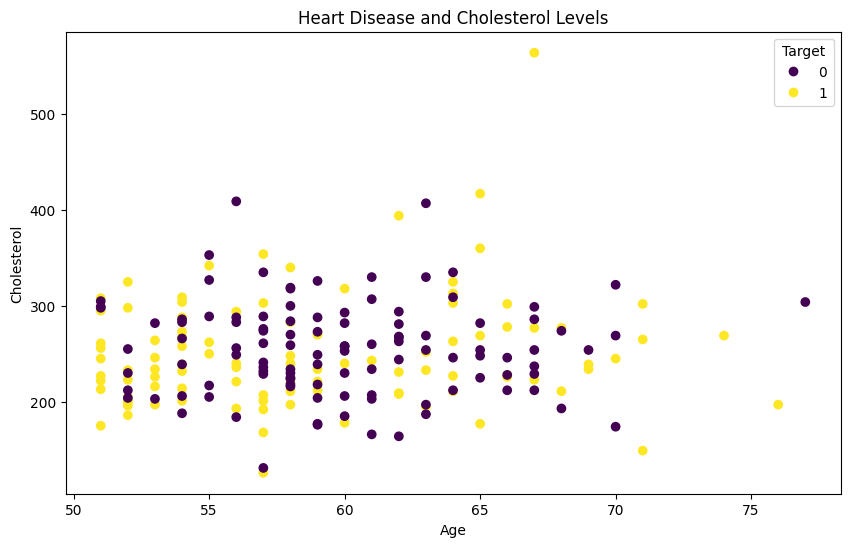

In [84]:
# Make a bit more of a complicated plot

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"])

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");
ax.legend(*scatter.legend_elements(), title="Target");

What if we wanted a horizontal line going across with the mean of `heart_disease["chol"]`?

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.axhline.html

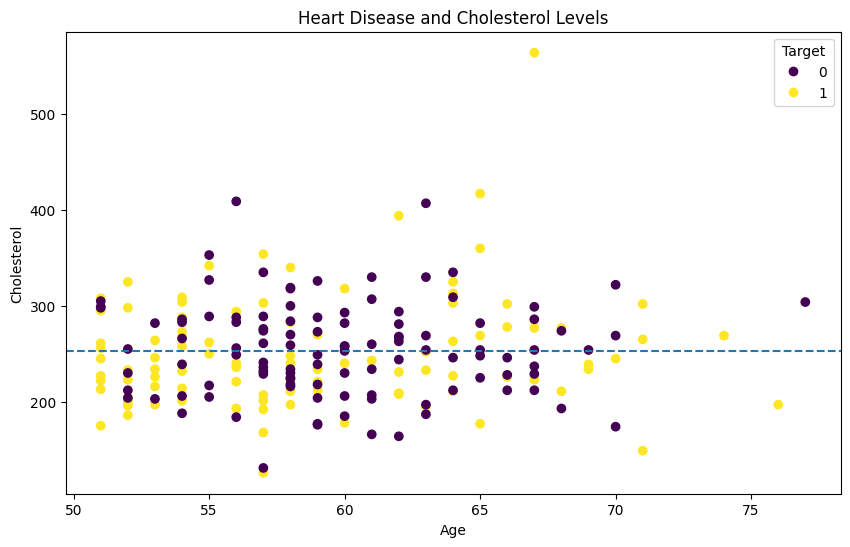

In [85]:
# Make a bit more of a complicated plot

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"])

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");
ax.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax.axhline(over_50["chol"].mean(),
           linestyle="--");

### Adding another plot to existing styled one

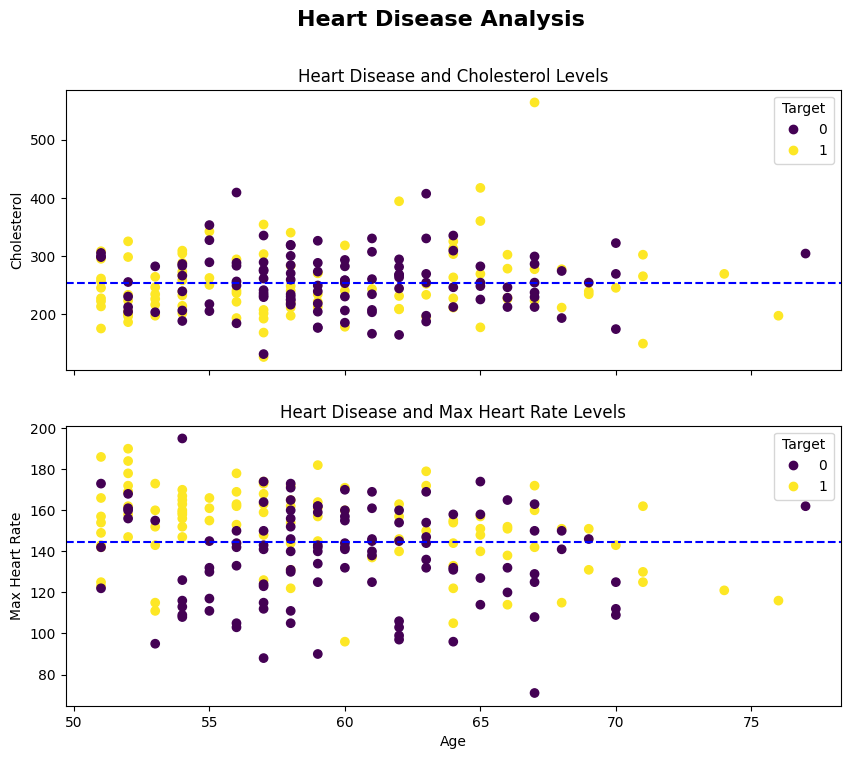

In [86]:
# Setup plot (2 rows, 1 column)
fig, (ax0, ax1) = plt.subplots(nrows=2, # 2 rows
                               ncols=1, 
                               sharex=True, 
                               figsize=(10, 8))

# Add data for ax0
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"])
# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")
ax0.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='b', 
            linestyle='--', 
            label="Average")


# Add data for ax1
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"])

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")
ax1.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='b', 
            linestyle='--', 
            label="Average")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

## 5. Customizing your plots

* `limits (xlim, ylim)`, `colors`, `styles`, `legends`

### Style

In [87]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [88]:
# Plot before changing style
car_sales["Price"].plot();

TypeError: no numeric data to plot

In [89]:
# Change the style... 
plt.style.use('seaborn-v0_8-whitegrid')

/tmp/ipykernel_25888/327593447.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [90]:
car_sales["Price"].plot();

TypeError: no numeric data to plot

In [91]:
plt.style.use('seaborn-v0_8')

/tmp/ipykernel_25888/240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [92]:
car_sales["Price"].plot();

TypeError: no numeric data to plot

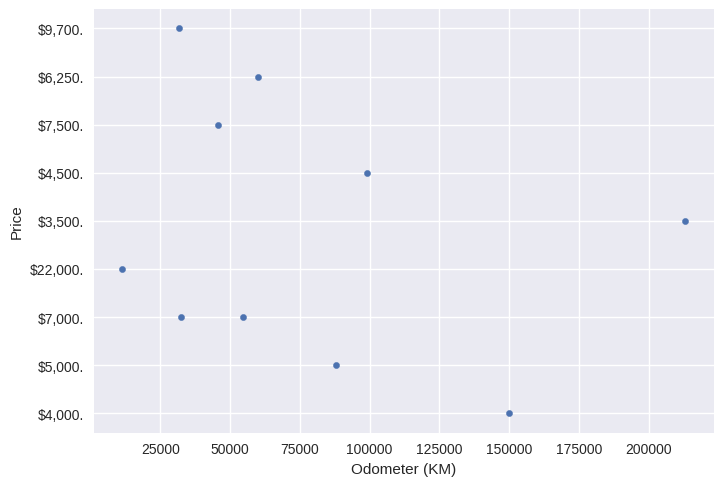

In [93]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [94]:
plt.style.use('ggplot')

In [95]:
car_sales["Price"].plot.hist();

TypeError: no numeric data to plot

### Changing the title, legend, axes 

In [111]:
x = np.random.randn(10, 4)
x

array([[ 0.1388676 ,  0.46621333, -0.65771891, -1.68565836],
       [-0.58318396, -1.61139548, -0.20886228,  0.07605161],
       [-1.10720157,  1.60664162, -1.29696021,  0.84325411],
       [-1.67379733,  1.00671985, -0.00621734, -2.50926669],
       [-0.28300639,  0.2271567 ,  0.28724742,  0.59091712],
       [-0.16451288,  0.86130811,  0.96819419,  2.23123009],
       [-0.60210412,  0.05335062, -0.40920448,  0.69489908],
       [-1.26214972,  0.99561586,  0.76922877, -0.09629248],
       [ 0.91972922, -0.58126206, -0.52543934,  1.44158103],
       [ 1.61747822, -0.45356206, -0.78577915, -1.1777407 ]])

In [112]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.138868,0.466213,-0.657719,-1.685658
1,-0.583184,-1.611395,-0.208862,0.076052
2,-1.107202,1.606642,-1.296960,0.843254
3,-1.673797,1.006720,-0.006217,-2.509267
4,-0.283006,0.227157,0.287247,0.590917
5,-0.164513,0.861308,0.968194,2.231230
6,-0.602104,0.053351,-0.409204,0.694899
7,-1.262150,0.995616,0.769229,-0.096292
8,0.919729,-0.581262,-0.525439,1.441581
9,1.617478,-0.453562,-0.785779,-1.177741


matplotlib.axes._axes.Axes

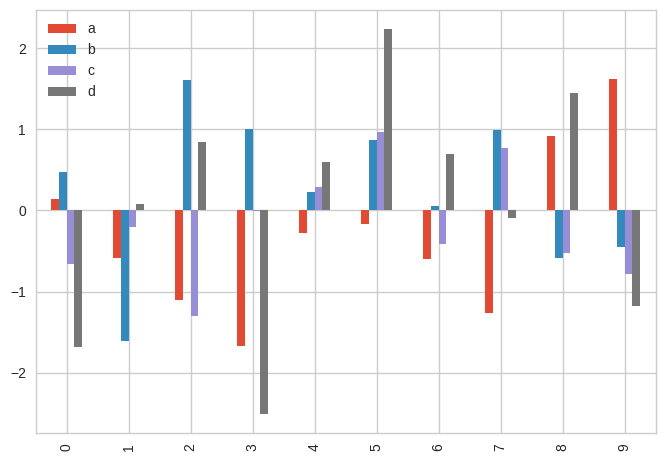

In [113]:
ax = df.plot(kind='bar')
type(ax)

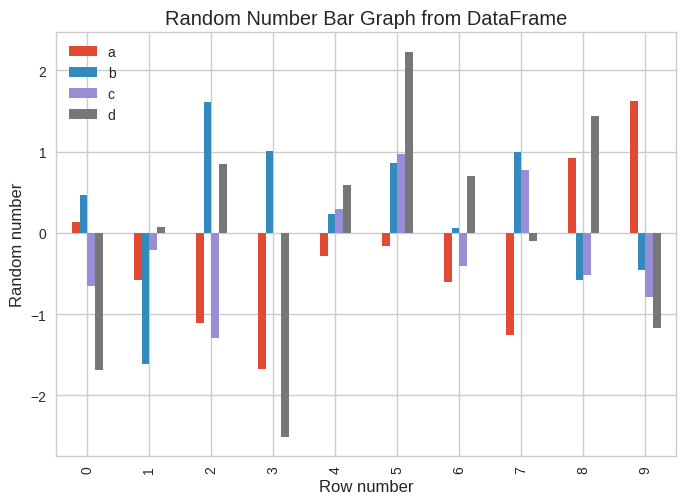

In [114]:
ax = df.plot(kind='bar')
ax.set(title="Random Number Bar Graph from DataFrame", 
       xlabel="Row number", 
       ylabel="Random number")
ax.legend().set_visible(True)

### Changing the cmap

In [126]:
plt.style.use('seaborn-v0_8-whitegrid')

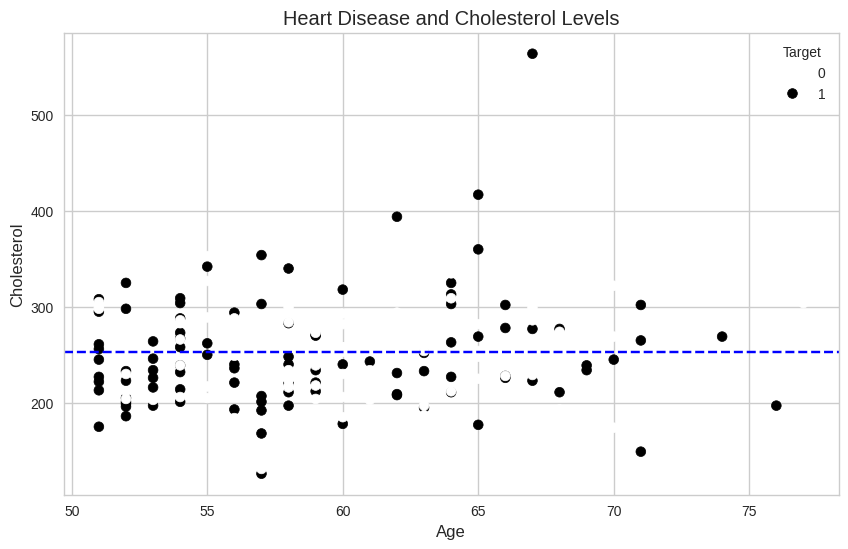

In [116]:
# No cmap change
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"])
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");
ax.axhline(y=over_50["chol"].mean(), 
           c='b', 
           linestyle='--', 
           label="Average");
ax.legend(*scatter.legend_elements(), title="Target");

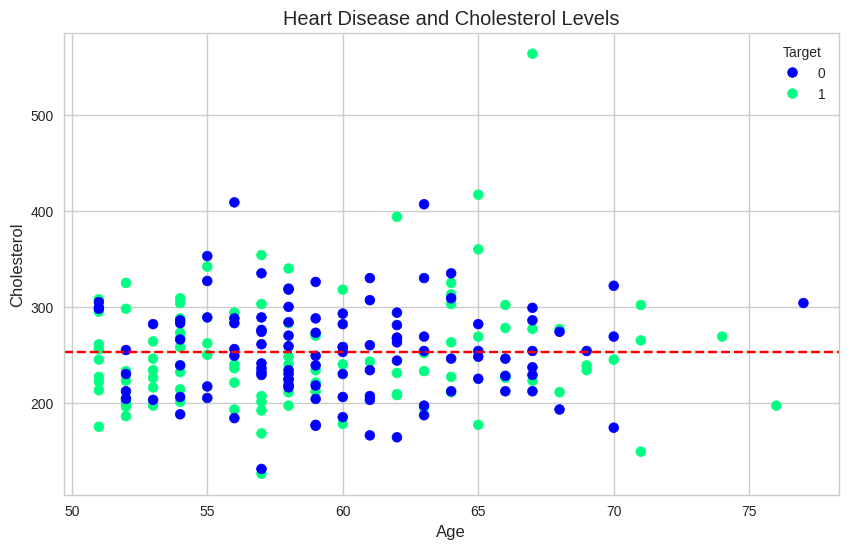

In [117]:
# Change cmap and horizontal line to be a different colour
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"], 
                     cmap="winter")
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol")
ax.axhline(y=over_50["chol"].mean(), 
           color='r', 
           linestyle='--', 
           label="Average");
ax.legend(*scatter.legend_elements(), title="Target");

### Changing the xlim & ylim

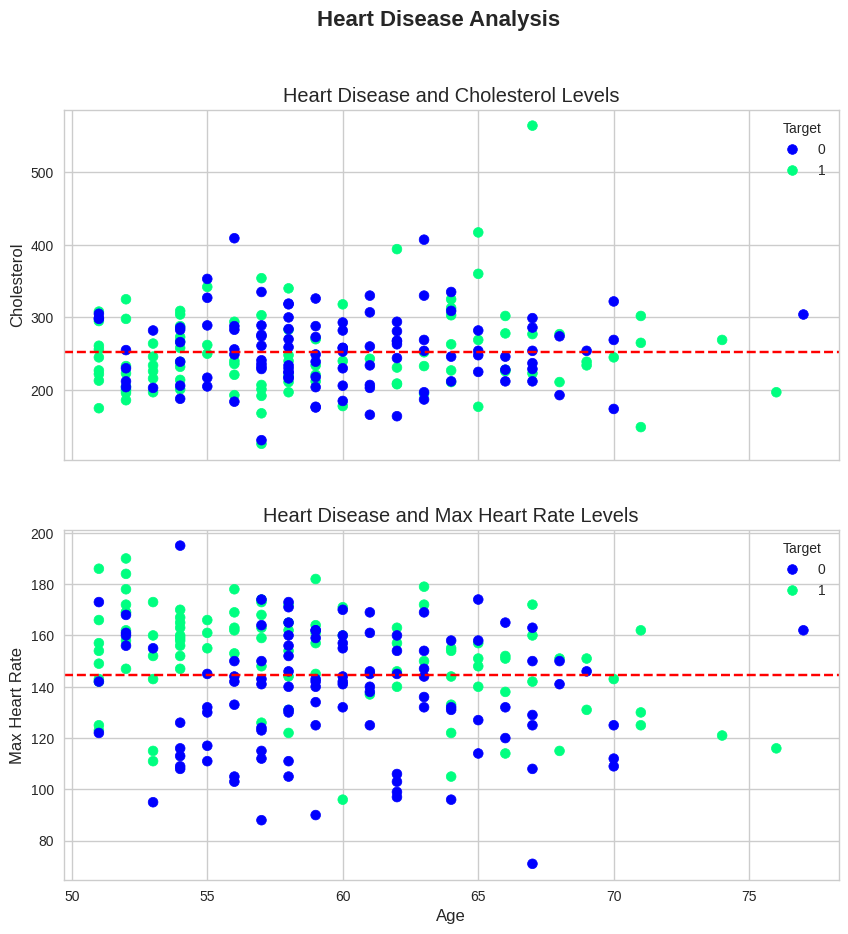

In [118]:
## Before the change (we've had color updates)

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 10))
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"],
                      cmap='winter')
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax0.legend(*scatter.legend_elements(), title="Target")

# Axis 1, 1 (row 1, column 1)
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"],
                      cmap='winter')
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax1.legend(*scatter.legend_elements(), title="Target")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

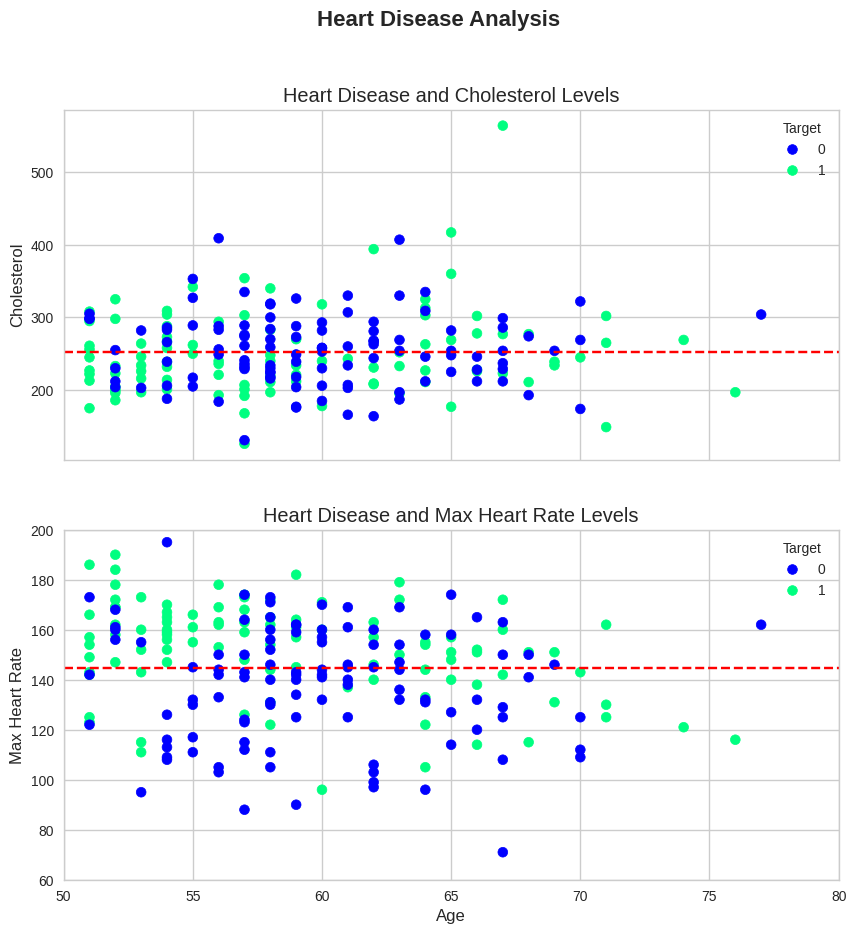

In [119]:
## After adding in different x & y limitations

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 10))
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"],
                      cmap='winter')
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

# Set the x axis
ax0.set_xlim([50, 80])

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax0.legend(*scatter.legend_elements(), title="Target")

# Axis 1, 1 (row 1, column 1)
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"],
                      cmap='winter')
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Set the y axis
ax1.set_ylim([60, 200])

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax1.legend(*scatter.legend_elements(), title="Target")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

## 6. Saving plots
* Saving plots to images using `figsave()`

If you're doing something like this often, to save writing excess code, you might put it into a function.

A function which follows the Matplotlib workflow.

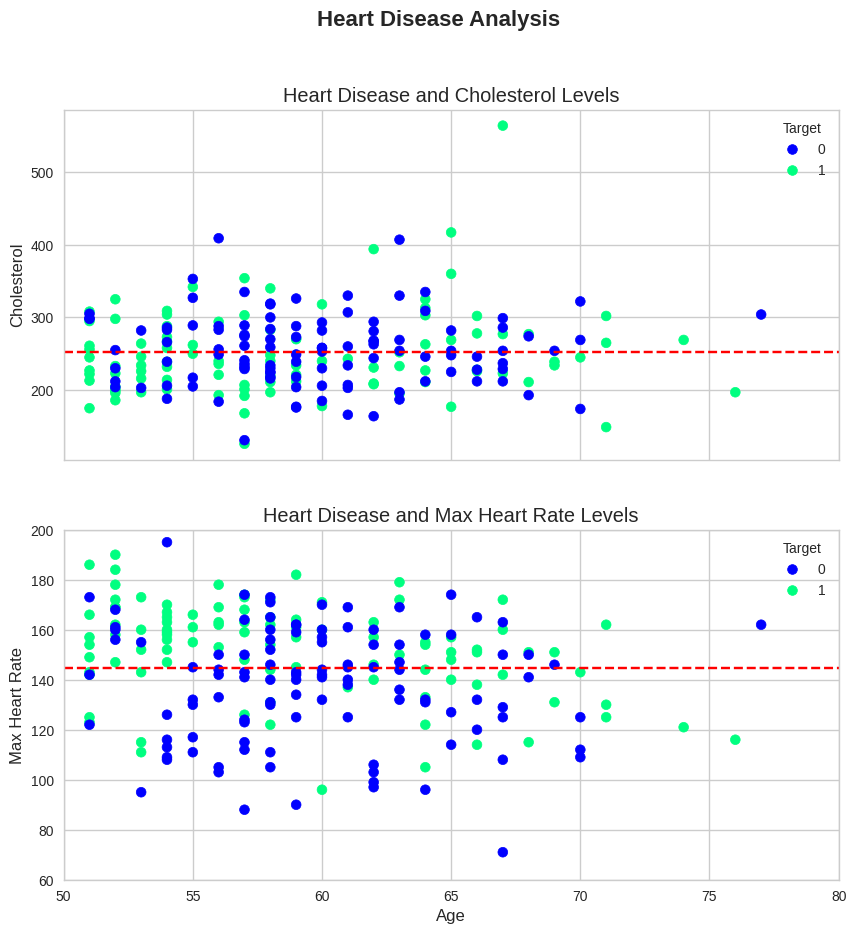

In [120]:
# Axis 0, 1 (row 0, column 0)
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 10))
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"],
                      cmap='winter')
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

# Set the x axis
ax0.set_xlim([50, 80])

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax0.legend(*scatter.legend_elements(), title="Target")

# Axis 1, 1 (row 1, column 1)
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"],
                      cmap='winter')
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Set the y axis
ax1.set_ylim([60, 200])

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax1.legend(*scatter.legend_elements(), title="Target")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

In [121]:
# Check the supported filetypes
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

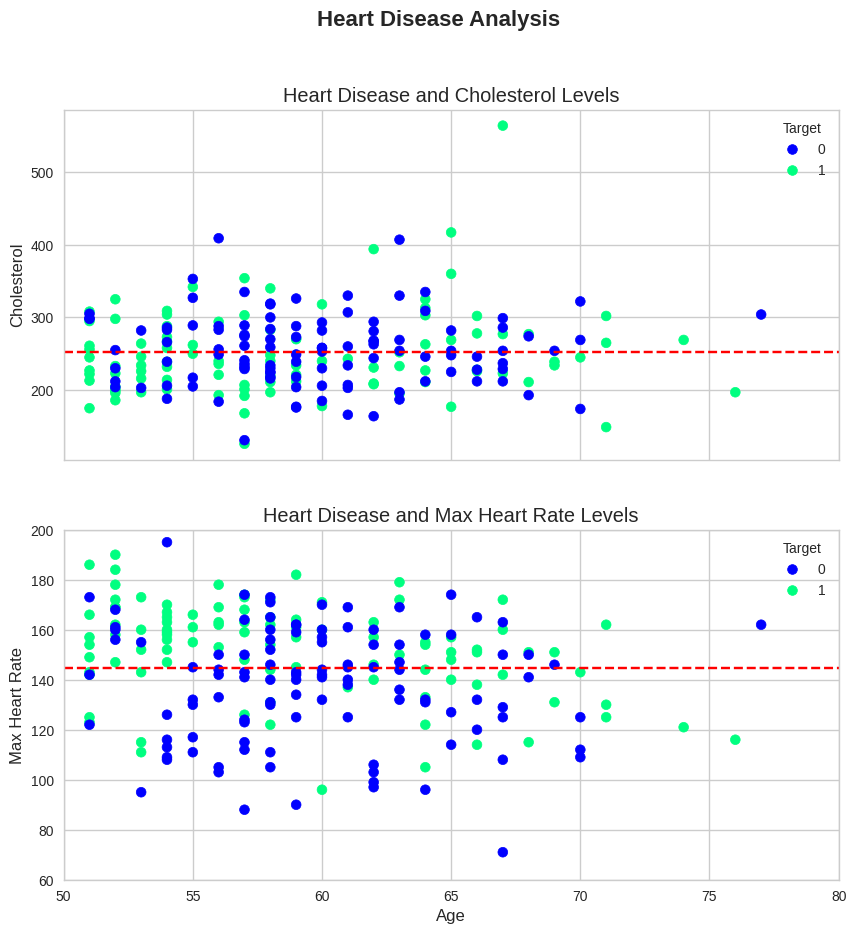

In [122]:
fig

In [123]:
# Save the file
fig.savefig("../images/heart-disease-analysis.png")

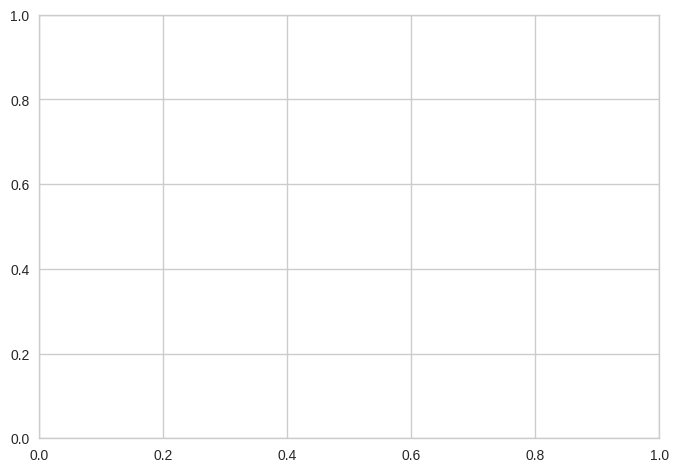

In [124]:
# Resets figure
fig, ax = plt.subplots()

In [125]:
# Potential function

def plotting_workflow(data):
    # 1. Manipulate data
    
    # 2. Create plot
    
    # 3. Plot data
    
    # 4. Customize plot
    
    # 5. Save plot
    
    # 6. Return plot
    
    return plot